In [237]:
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_iris

In [238]:
iris = load_iris()

In [239]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [240]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [241]:
iris.target_names, iris.target

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [242]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['clase'] = iris.target

In [243]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Ejemplo de Perceptron, solo se utilizaran dos clases para convertir a binaria

In [244]:
X = iris.data[:, (2, 3)] 
y = iris.target

X.shape, y.shape

((150, 2), (150,))

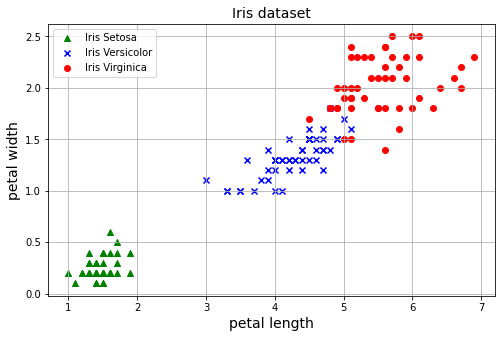

In [245]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], marker = '^', color = 'green', label="Iris Setosa")
plt.scatter(X[y==1, 0], X[y==1, 1], marker = 'x', color = 'blue',  label="Iris Versicolor")
plt.scatter(X[y==2, 0], X[y==2, 1], marker = 'o', color = 'red', label="Iris Virginica")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [246]:
y = (iris.target == 0).astype(np.int64)

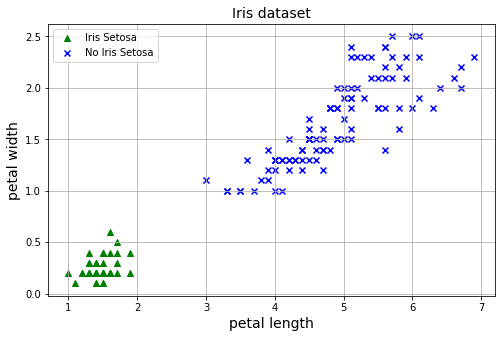

In [247]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y==1, 0], X[y==1, 1], marker = '^', color = 'green', label="Iris Setosa")
plt.scatter(X[y==0, 0], X[y==0, 1], marker = 'x', color = 'blue', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

### Perceptron

In [248]:
class Perceptron():
  def __init__(self, size):
    self.w = np.random.randn(size) 
    self.ws = []
    
  def __call__(self, w, x):
    return np.dot(x, w) > 0 

  def fit(self, x, y, epochs, lr):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(epochs):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # función de pérdida (MSE)
        l = 0.5*(y_hat - y)**2
        # derivadas
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # actualizar pesos
        self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())

In [249]:
## Normalizacion de la forma
#X_norm = (X - X_mean) / X_std

print(X.mean(axis=0), X.std(axis=0))

X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std

print(X_norm.mean(axis=0), X_norm.std(axis=0))

[3.758      1.19933333] [1.75940407 0.75969263]
[-4.26325641e-16 -4.73695157e-16] [1. 1.]


In [250]:
np.random.seed(42)

perceptron = Perceptron(3)
epochs, lr = 30, 0.1
perceptron.fit(X_norm, y, epochs, lr)

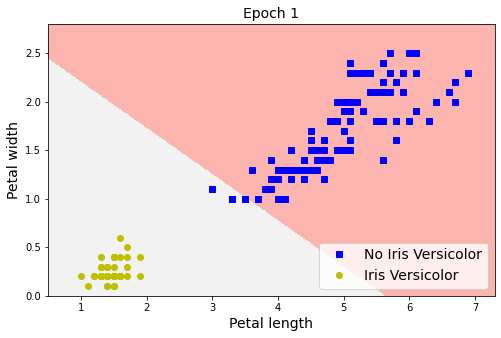

In [251]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0.5, 7.3, 0, 2.8], label="Iris Versicolor"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = (np.c_[x0.ravel(), x1.ravel()] - X_mean)/X_std
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap='Pastel1')
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = FuncAnimation(fig, plot, frames=epochs, interval=200)
anim.save('iris.mp4')
plt.show()